In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
class Exchanger:
    money = 100
    
    def __init__(self, prices, portfolio, log=False):
        assert prices.__len__() == portfolio.__len__()
        assert sum(portfolio) > 0
        
        self.prices = np.array(prices)
        portfolio = np.asarray(portfolio) / np.sum(portfolio)
        self.portfolio = np.zeros(len(portfolio))
        
        for i, x in enumerate(zip(prices, portfolio)):
            pr, x = x
            self.portfolio[i] = (self.money * x) / pr
            
        self.log = log
        if self.log:
            self.log_portfo = [self.portfolio]
            self.log_prices = [self.prices]
        
    
    def exchange(self, prices, portfolio):
        assert prices.__len__() == portfolio.__len__()
        
        portfolio[portfolio < 0] = 0
        
        if sum(self.portfolio > 0):
            self.money = 0
            for pr, x in zip(prices, self.portfolio):
                self.money += x * pr
            
        if sum(portfolio) == 0:
            self.portfolio = np.zeros(len(portfolio))
        else:
            portfolio = np.asarray(portfolio) / np.sum(portfolio)

            for i, x in enumerate(zip(prices, portfolio)):
                pr, x = x
                self.portfolio[i] = (self.money * x) / pr

            self.prices = prices
            
        if self.log:
            self.log_portfo.append(self.portfolio)
            self.log_prices.append(self.prices)


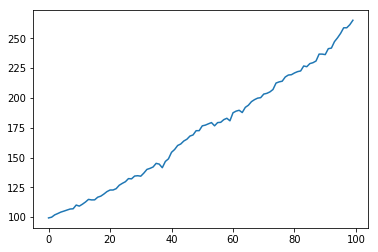

In [100]:
prs = [1000, 1000, 1000, 1000, 1000]
ports = [1] * len(prs)
ex = Exchanger(prs, ports, True)

trends = []
for i in range(100):
    dpr = np.random.randn(len(prs)) * 0.01 
    pr = prs * (1 + dpr)
    
    prof = pr - ex.prices
#     prs = pr
    
    ex.exchange(pr, -dpr)
    trends.append(ex.money)
    
    
plt.plot(trends); plt.show()

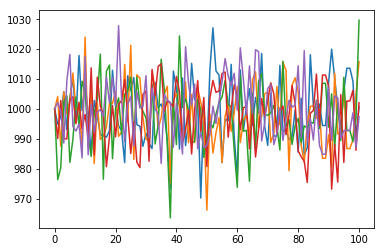

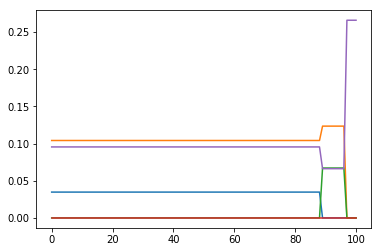

In [101]:
for x in np.asarray(ex.log_prices).T:
    plt.plot(x)
plt.show()

for x in np.asarray(ex.log_portfo).T:
    plt.plot(x)
plt.show()
